In [13]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)/'images'

In [5]:
dbunch = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, label_func=lambda x:x[0].isupper(), seed=42, item_tfms=Resize(224))


In [6]:
learn = cnn_learner(dbunch, resnet34, metrics=error_rate)

In [7]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.214168,0.056562,0.012179,02:21


epoch,train_loss,valid_loss,error_rate,time
0,0.062763,0.030207,0.004736,03:46


NameError: name 'image_cat' is not defined

In [9]:
def is_cat(x): return x[0].isupper()

In [10]:
uploader = widgets.FileUpload()

NameError: name 'widgets' is not defined

In [11]:
import ipywidgets as widgets

ModuleNotFoundError: No module named 'ipywidgets'

In [14]:
img = PILImage.create('./images/cat.jpeg')

In [15]:
is_cat, _, probs = learn.predict(img)

In [16]:
is_cat

'True'

In [17]:
probs

tensor([7.1221e-28, 1.0000e+00])

In [18]:
probs[1].item()

1.0

In [28]:
def predict(image):
    is_cat, other_data, probs = learn.predict(img)
    return is_cat, other_data, probs[1].item()

In [29]:
predict(PILImage.create('./images/dog.jpeg'))

('True', tensor(1), 1.0)

In [27]:
predict(PILImage.create('./images/bird.jpeg'))

('True', 1.0)

In [30]:
path = untar_data(URLs.CAMVID_TINY)

In [36]:
import numpy as np
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/"images"), 
                                              label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
                                              codes= np.loadtxt(path/'codes.txt', dtype=str))
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)


epoch,train_loss,valid_loss,time
0,3.401417,2.490828,00:15


epoch,train_loss,valid_loss,time
0,1.950927,1.857917,00:08
1,1.664521,1.362543,00:07
2,1.447351,1.232896,00:07
3,1.284998,0.997658,00:07
4,1.138996,0.910045,00:07
5,1.019340,0.862734,00:07
6,0.922890,0.835298,00:07
7,0.846790,0.825624,00:07


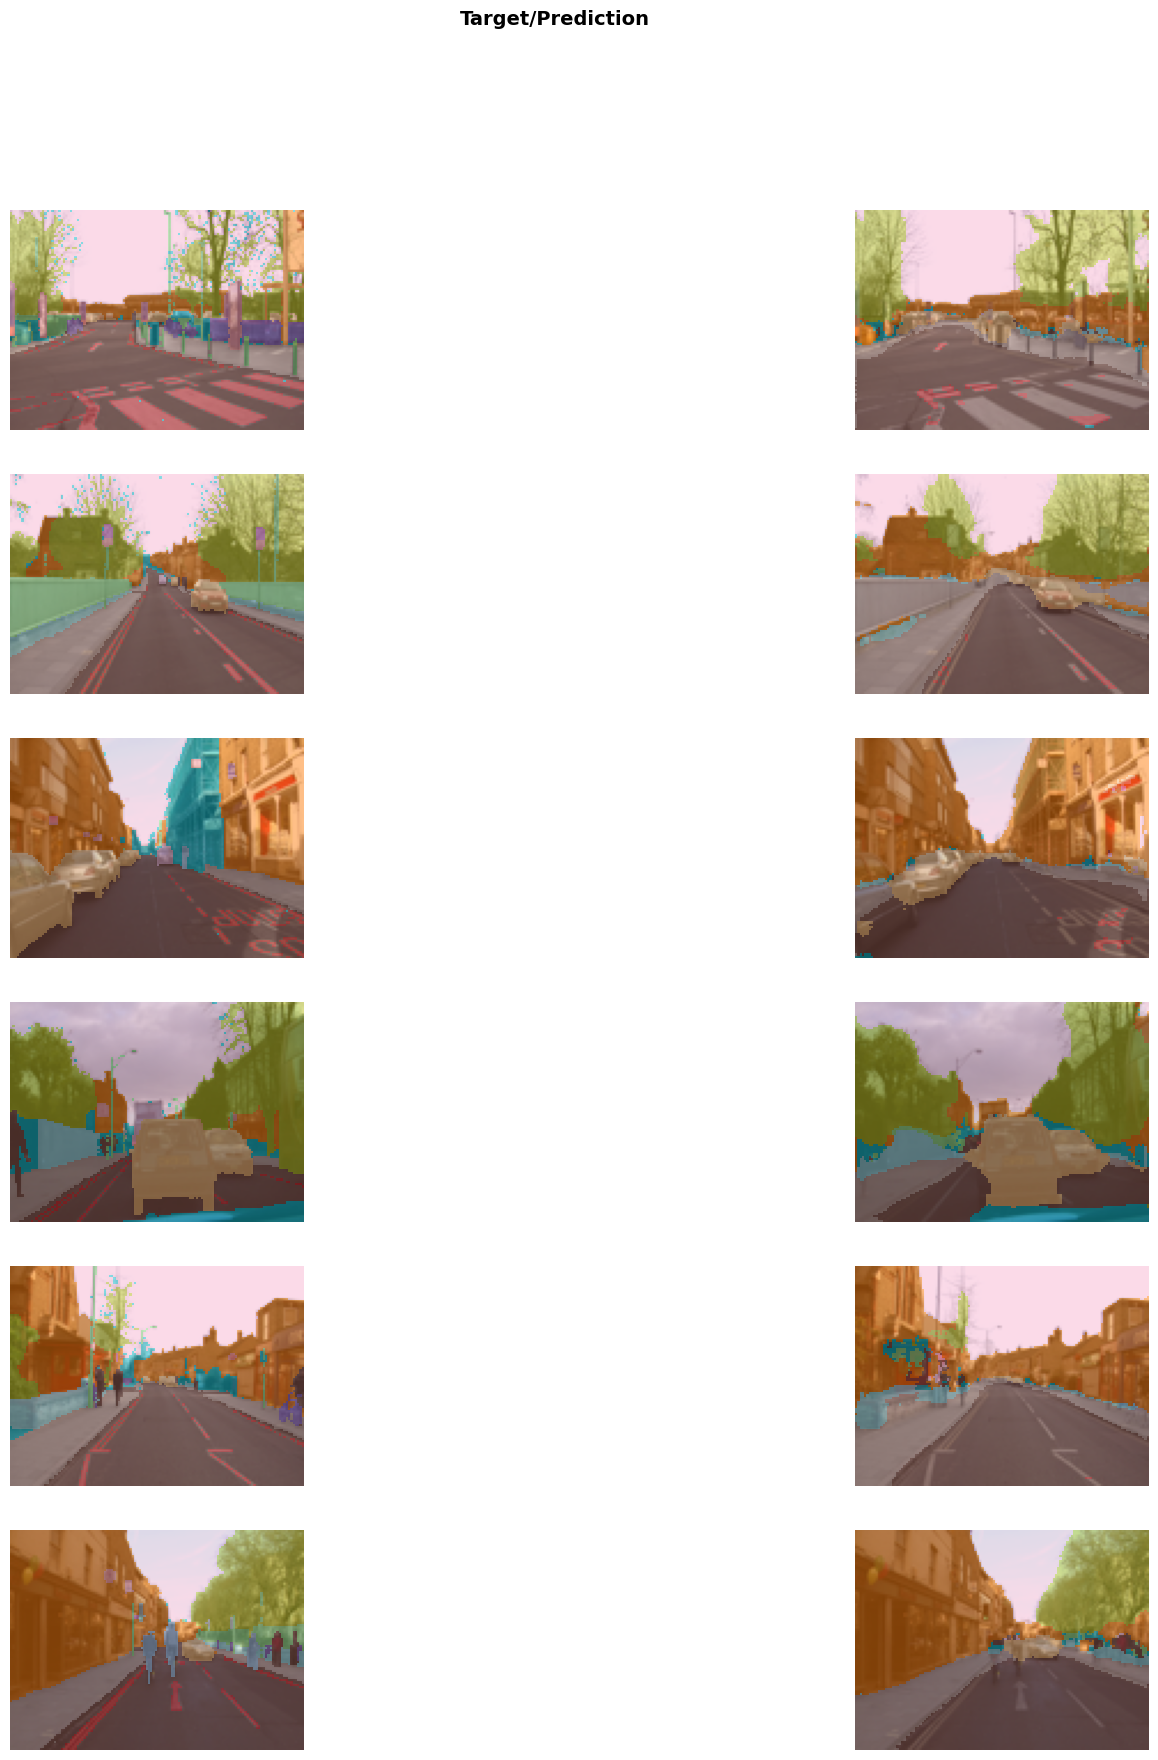

In [38]:
learn.show_results(max_n=6, figsize=(20,20))

In [39]:
from fastai.text.all import *

In [ ]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4,1e-2)

epoch,train_loss,valid_loss,accuracy,time
